## Replicating FIFA Football Intelligence - Goalkeeping Distributions (Player)

---
> ### 1. SET UP DEVELOPMENT ENVIRONMENT

**1.0 Import required Python software into current development environment (i.e. this notebook)**
```
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
```

**1.1 Configure notebook for code autocompletion + displaying plots + displaying max columns and rows of panda data objects**
```
%config Completer.use_jedi = False
%matplotlib inline
pd.options.display.max_rows, pd.options.display.min_rows = 20, 20
```

---
> ### 2. LOAD & PREP DATA

**2.0** Read in the `match_data.csv` file located in the `data` directory (folder)
```
raw_data = pd.read_csv("data/match_data.csv")
```

**2.1** Make a copy of raw data to work on called `df`

```
df = raw_data.copy()
```

**2.2** View the `df` objet, which is a `pandas` dataframe (df), basically a tabular, 2 dimensional data structure with rows & columns:
```
df
```

In [6]:
df

,start_min,start_sec,end_min,end_sec,match_half,player1,player1_team,player2,player2_team,event,event_detail,press,start_x,start_y,end_x,end_y,press_x,press_y
0,0,0,0.0,0.0,1,fernandes,man_u,NaN,NaN,set_piece,kickoff,NaN,52.5,34.0,NaN,NaN,NaN,NaN
1,0,0,0.0,1.0,1,fernandes,man_u,ronaldo,man_u,completed_pass,NaN,NaN,52.5,34.0,55.8,31.3,NaN,NaN
2,0,1,0.0,2.0,1,ronaldo,man_u,matic,man_u,completed_pass,NaN,odegaard,55.8,31.3,65.6,33.4,55.7,30.4
3,0,2,0.0,3.0,1,matic,man_u,dalot,man_u,completed_pass,NaN,nketiah,65.6,33.4,72.2,55.2,63.4,36.4
4,0,3,0.0,5.0,1,dalot,man_u,NaN,NaN,incomplete_pass,attempted_longball,NaN,72.2,55.2,NaN,NaN,NaN,NaN
5,0,5,NaN,NaN,1,gabriel,arsenal,NaN,NaN,won_intercepted_longball,intercepted_longball,NaN,29.7,43.0,NaN,NaN,NaN,NaN
6,0,6,NaN,NaN,1,gabriel,arsenal,NaN,NaN,lost_miscontrolled,NaN,NaN,29.7,44.0,NaN,NaN,NaN,NaN
7,0,7,NaN,NaN,1,elneny,arsenal,NaN,NaN,recovered_looseball,NaN,fernandes,37.6,40.0,NaN,NaN,37.0,40.0
8,0,8,0.0,10.0,1,elneny,arsenal,cedric,arsenal,completed_pass,NaN,fernandes,37.6,40.0,28.8,18.3,37.4,42.6
9,0,10,0.0,14.0,1,cedric,arsenal,NaN,NaN,incomplete_pass,NaN,sancho,28.8,18.3,NaN,NaN,31.5,13.0


**2.3** Check the dimensions of the `df` (<no. of rows>, <no. of columns>). Should be (1912, 18).
```
df.shape
```

(1912, 18)

**2.4** Load the `pitch.png` graphic located in the `data` directory (folder) and store in a variable called `pitch`
```
pitch = Image.open("data/pitch.png")
```

**2.5** Check the `pitch` object using `imshow()` function available from the `matplotlib` plotting library:
```
plt.imshow(pitch)
```

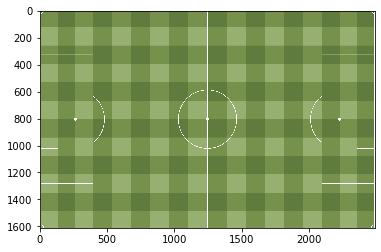

---
> ### 3.PREP DATA FOR GENERATING THE GOALIE DISTRIBUTION VISUALISATIONS

**3.0** Get a list of the different players, i.e. text values, in the `player1` column using the `unique()` function:
```
df["player1"].unique()
```

array(['fernandes', 'ronaldo', 'matic', 'dalot', 'gabriel', 'elneny',
       'cedric', 'sancho', 'telles', 'saka', 'general_event', 'white',
       'tavares', 'xhaka', 'lindelof', 'odegaard', 'varane', 'de_gea',
       'ramsdale', 'mctominay', 'nketiah', 'elanga', 'smith_rowe',
       'martinelli', 'rashford', 'lingard', 'holding', 'mata', 'tomiyasu'],
      dtype=object)

**3.1** Create a new variable called `goalie` and set this to the text string representing either goalie, i.e. `"de_gea"` or `"ramsdale"`:
```
goalie = "de_gea"
```

**3.2** Create a new variable called `goalie_df` containing just rows from the `df` data where the value in the `"player1"` column is the same as the value in the `goalie` variable, i.e. `"de_gea"` or `"ramsdale"`:
```
goalie_df = df[df["player1"] == goalie].copy()
```

**3.3** Check the new `goalie_df` data:
```
goalie_df
```

,start_min,start_sec,end_min,end_sec,match_half,player1,player1_team,player2,player2_team,event,event_detail,press,start_x,start_y,end_x,end_y,press_x,press_y
73,2,10,NaN,NaN,1,de_gea,man_u,NaN,NaN,goal_defence,ontarget_saved,NaN,103.2,35.9,NaN,NaN,NaN,NaN
121,5,1,5.0,2.0,1,de_gea,man_u,varane,man_u,completed_pass,NaN,nketiah,101.1,40.4,91.7,11.8,95.0,43.0
286,13,20,13.0,23.0,1,de_gea,man_u,NaN,NaN,incomplete_pass,attempted_longball,nketiah,90.7,25.0,35.0,12.0,82.5,26.0
356,18,43,NaN,NaN,1,de_gea,man_u,NaN,NaN,set_piece,goal_kick,NaN,99.1,34.0,NaN,NaN,NaN,NaN
357,18,43,18.0,45.0,1,de_gea,man_u,varane,man_u,completed_pass,NaN,NaN,99.1,34.0,97.3,26.2,NaN,NaN
381,19,13,19.0,14.0,1,de_gea,man_u,varane,man_u,completed_pass,NaN,NaN,98.8,34.3,92.1,26.2,NaN,NaN
534,24,42,NaN,NaN,1,de_gea,man_u,NaN,NaN,goal_defence,ontarget_saved,NaN,102.5,34.0,NaN,NaN,NaN,NaN
589,31,19,NaN,NaN,1,de_gea,man_u,NaN,NaN,penalty,penalty_not_saved,NaN,104.4,33.1,NaN,NaN,NaN,NaN
596,32,35,NaN,NaN,1,de_gea,man_u,NaN,NaN,recovered_looseball,NaN,NaN,96.6,28.8,NaN,NaN,NaN,NaN
597,32,36,32.0,38.0,1,de_gea,man_u,dalot,man_u,completed_pass,NaN,NaN,96.6,28.8,80.1,59.9,NaN,NaN


**3.4** Have a look at what's in the `event` column by using the `value_counts()` function to roll-up how many rows there are in the `goalie_df` data of each category:
```
goalie_df["event"].value_counts()
```

completed_pass         17
set_piece               7
goal_defence            5
incomplete_pass         2
gk_collect              2
dribble                 2
penalty                 1
recovered_looseball     1
gk_carry                1
clearance               1
Name: event, dtype: int64

**3.5** Make a cut of the `goalie_df` that only has the actions reflecting distribution of the ball by filtering `goalie_df` for the rows which have `"completed_pass"`, `"incomplete_pass"`, or `"clearance"` in the `event` column, and saving this down as a new variable called `dist`:
```
dist = goalie_df[ goalie_df["event"].isin(["completed_pass", "incomplete_pass", "clearance"])].copy()
```

**3.6** Check the new `dist` data:
```
dist
```

,start_min,start_sec,end_min,end_sec,match_half,player1,player1_team,player2,player2_team,event,event_detail,press,start_x,start_y,end_x,end_y,press_x,press_y
121,5,1,5.0,2.0,1,de_gea,man_u,varane,man_u,completed_pass,NaN,nketiah,101.1,40.4,91.7,11.8,95.0,43.0
286,13,20,13.0,23.0,1,de_gea,man_u,NaN,NaN,incomplete_pass,attempted_longball,nketiah,90.7,25.0,35.0,12.0,82.5,26.0
357,18,43,18.0,45.0,1,de_gea,man_u,varane,man_u,completed_pass,NaN,NaN,99.1,34.0,97.3,26.2,NaN,NaN
381,19,13,19.0,14.0,1,de_gea,man_u,varane,man_u,completed_pass,NaN,NaN,98.8,34.3,92.1,26.2,NaN,NaN
597,32,36,32.0,38.0,1,de_gea,man_u,dalot,man_u,completed_pass,NaN,NaN,96.6,28.8,80.1,59.9,NaN,NaN
717,39,30,39.0,33.0,1,de_gea,man_u,fernandes,man_u,completed_pass,NaN,NaN,101.5,41.0,90.9,59.5,NaN,NaN
721,39,42,39.0,45.0,1,de_gea,man_u,varane,man_u,completed_pass,NaN,NaN,100.9,35.3,94.8,6.8,NaN,NaN
771,42,7,42.0,9.0,1,de_gea,man_u,lindelof,man_u,completed_pass,NaN,odegaard,97.0,34.3,86.6,33.3,92.5,28.0
916,48,24,48.0,28.0,1,de_gea,man_u,ronaldo,man_u,completed_pass,longball,NaN,98.7,32.5,46.8,11.6,NaN,NaN
928,48,51,48.0,53.0,1,de_gea,man_u,varane,man_u,completed_pass,NaN,nketiah,97.6,33.1,94.1,7.0,95.0,34.0


**3.7** Use the `drop()` function to remove a selection of columns based on their index position in the dataframe - specifying `inplace=True` is critical for making the drop stick rather than just being a temporary view
```
dist.drop( dist.columns[[ 0,1,2,3,4,6,8,11,16,17 ]], axis=1, inplace=True)
```

**3.8** Check the updated `dist`
```
dist
```

,player1,player2,event,event_detail,start_x,start_y,end_x,end_y
121,de_gea,varane,completed_pass,NaN,101.1,40.4,91.7,11.8
286,de_gea,NaN,incomplete_pass,attempted_longball,90.7,25.0,35.0,12.0
357,de_gea,varane,completed_pass,NaN,99.1,34.0,97.3,26.2
381,de_gea,varane,completed_pass,NaN,98.8,34.3,92.1,26.2
597,de_gea,dalot,completed_pass,NaN,96.6,28.8,80.1,59.9
717,de_gea,fernandes,completed_pass,NaN,101.5,41.0,90.9,59.5
721,de_gea,varane,completed_pass,NaN,100.9,35.3,94.8,6.8
771,de_gea,lindelof,completed_pass,NaN,97.0,34.3,86.6,33.3
916,de_gea,ronaldo,completed_pass,longball,98.7,32.5,46.8,11.6
928,de_gea,varane,completed_pass,NaN,97.6,33.1,94.1,7.0


**3.9** Use the `matplotlib` plotting library to test how to make a basic plot of an arrow on our pitch graphic, `pitch` using the `arrow()` function and test data:
```
fig, ax = plt.subplots()
ax.imshow(pitch, extent=[0, 105, 0, 68])
plt.arrow(x=52.5, y=34, dx=20, dy=10, width=0.5)
```

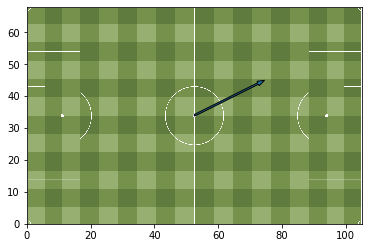

**3.10** Create 2x new columns in the `dist` object called `dx` and `dy` that are the calculated as the `end_x` column minus the `start_x` column, and the `end_y` column minus the `start_y` column respectively:
```
dist["dx"] = dist["end_x"] - dist["start_x"]
dist["dy"] = dist["end_y"] - dist["start_y"]
```

**3.11** Check `dist` for these new columns:
```
dist
```

,player1,player2,event,event_detail,start_x,start_y,end_x,end_y,dx,dy
121,de_gea,varane,completed_pass,NaN,101.1,40.4,91.7,11.8,-9.4,-28.6
286,de_gea,NaN,incomplete_pass,attempted_longball,90.7,25.0,35.0,12.0,-55.7,-13.0
357,de_gea,varane,completed_pass,NaN,99.1,34.0,97.3,26.2,-1.8,-7.8
381,de_gea,varane,completed_pass,NaN,98.8,34.3,92.1,26.2,-6.7,-8.1
597,de_gea,dalot,completed_pass,NaN,96.6,28.8,80.1,59.9,-16.5,31.1
717,de_gea,fernandes,completed_pass,NaN,101.5,41.0,90.9,59.5,-10.6,18.5
721,de_gea,varane,completed_pass,NaN,100.9,35.3,94.8,6.8,-6.1,-28.5
771,de_gea,lindelof,completed_pass,NaN,97.0,34.3,86.6,33.3,-10.4,-1.0
916,de_gea,ronaldo,completed_pass,longball,98.7,32.5,46.8,11.6,-51.9,-20.9
928,de_gea,varane,completed_pass,NaN,97.6,33.1,94.1,7.0,-3.5,-26.1


---
> ### 4. GENERATE THE GOALIE DISTRIBUTION VISUALISATIONS

**4.0** Use the `matplotlib` plotting library again this time to create arrows and markers that plot on the `pitch` graphic the start and end location of each the distribution actions taken by the chosen goalie. Using a `for loop` and the `iterrows()` function the distribution will be coloured maroon if they are `"completed_passes"` or turquoise if not/anything else, i.e. `"incomplete_pass"`, and `"clearance"`. 

TIP: Check out the range of official named colors you can use with matplotlib https://matplotlib.org/stable/gallery/color/named_colors.html#css-colors

```
fig, ax = plt.subplots(figsize=(30,20))
plt.axis( [0,105,0,68])
ax.imshow(pitch, extent=[0,105,0,68])

for index, row in dist.iterrows():
    if row["event"] == "completed_pass":
        plt.arrow(x=row["start_x"], y = row["start_y"], dx= row["dx"], dy=row["dy"], color="maroon", head_width=1, linewidth =4, shape="full")
        plt.scatter(x= row["start_x"] , y= row["start_y"], s=1000, c="maroon", edgecolors="white", linewidth=3)
    else:
        plt.arrow(x=row["start_x"], y = row["start_y"], dx= row["dx"], dy=row["dy"], color="darkturquoise", head_width=1, linewidth =4, shape="full")
        plt.scatter(x= row["start_x"] , y= row["start_y"], s=1000, c="darkturquoise", edgecolors="white", linewidth=3)
```
Extra options:    
-plt.tight_layout()   
-plt.savefig("FIFAIntel_GoalieDist.png")

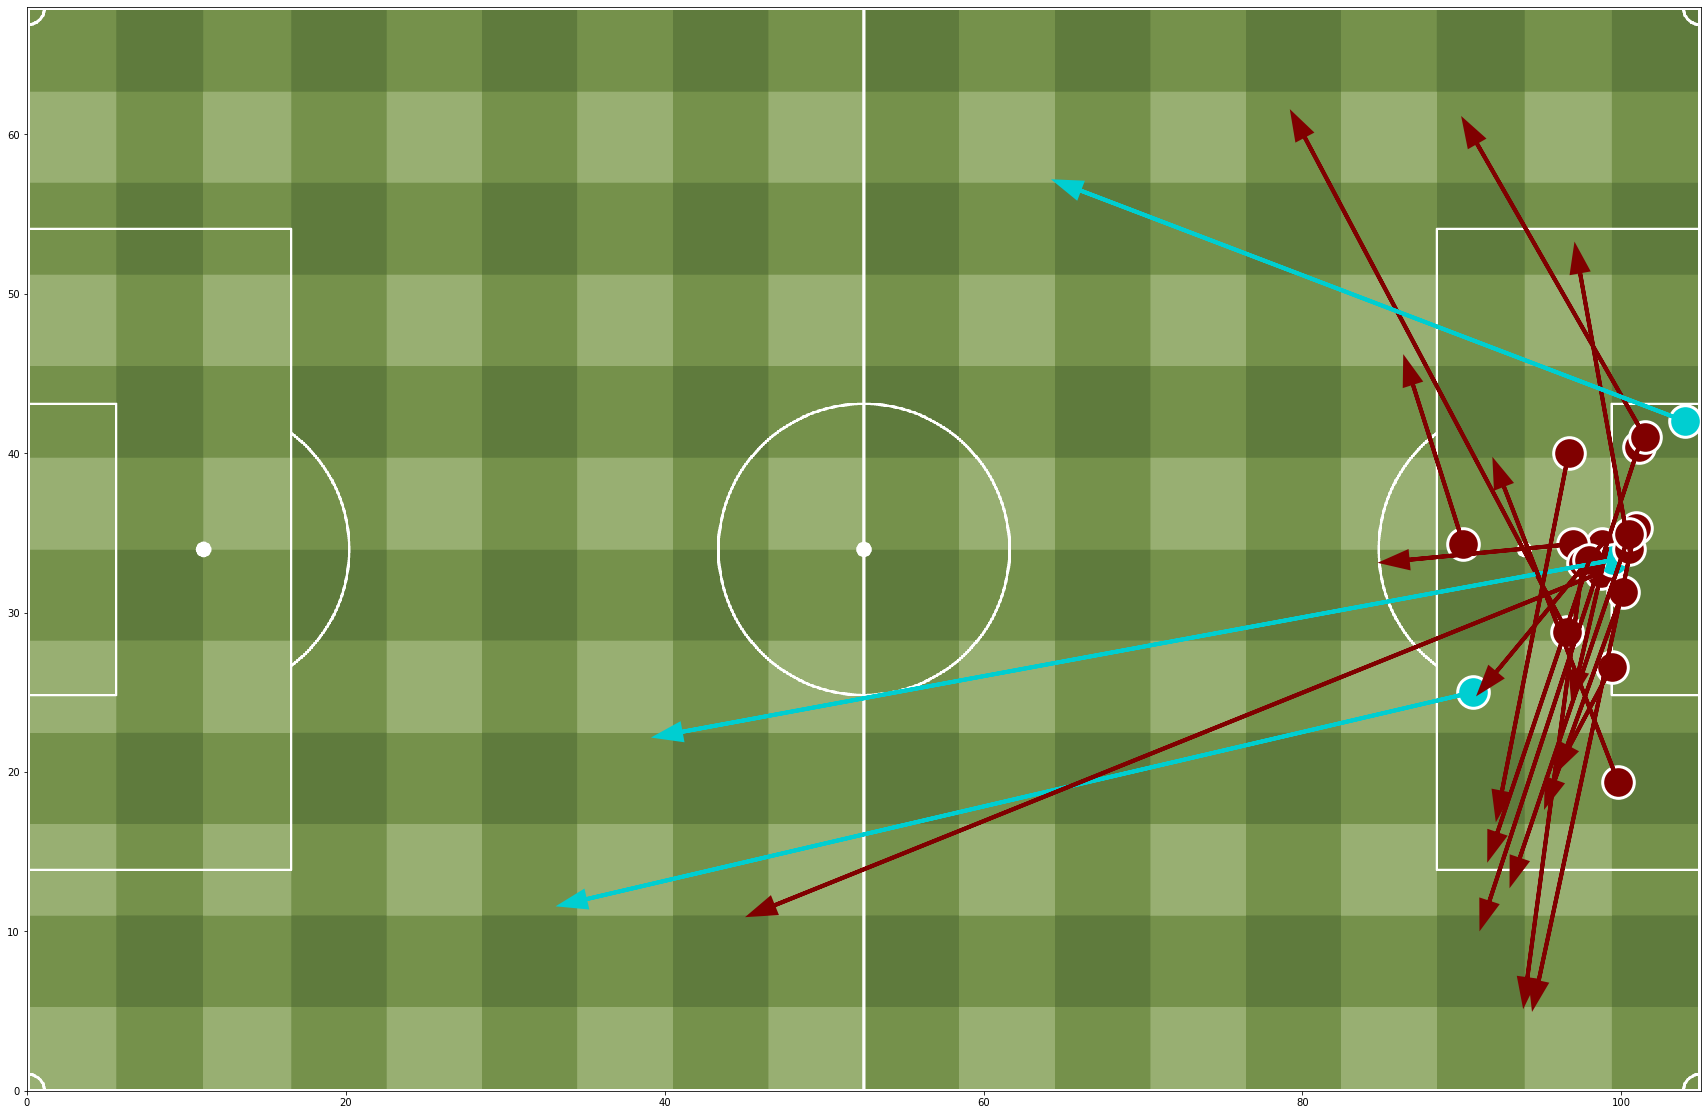

**4.1 EXTENSION** - create a Pass Map showing both Man U and Arsenal's completed passes by copying the code in `3.13`, then adding a copy of the code that plots Man U's passes as arrows but calling this `iterrows()` function on `ARS_df`  

```
fig, ax = plt.subplots(figsize=(20, 10))
plt.axis( [0, 105, 0, 68] )
ax.imshow(pitch, extent=[0, 105, 0, 68])

for index, row in MU_df.iterrows():
    plt.arrow(x=row["start_x"], y=row["start_y"], dx=row["dx"], dy=row["dy"], color="dodgerblue", head_width=1, overhang=1)
    
for index, row in ARS_df.iterrows():
    plt.arrow(x=row["start_x"], y=row["start_y"], dx=row["dx"], dy=row["dy"], color="peru", head_width=1, overhang=1)

```
Extra options:        
-head_length = 1, linewidth=2    
-plt.savefig("team_passes.png")

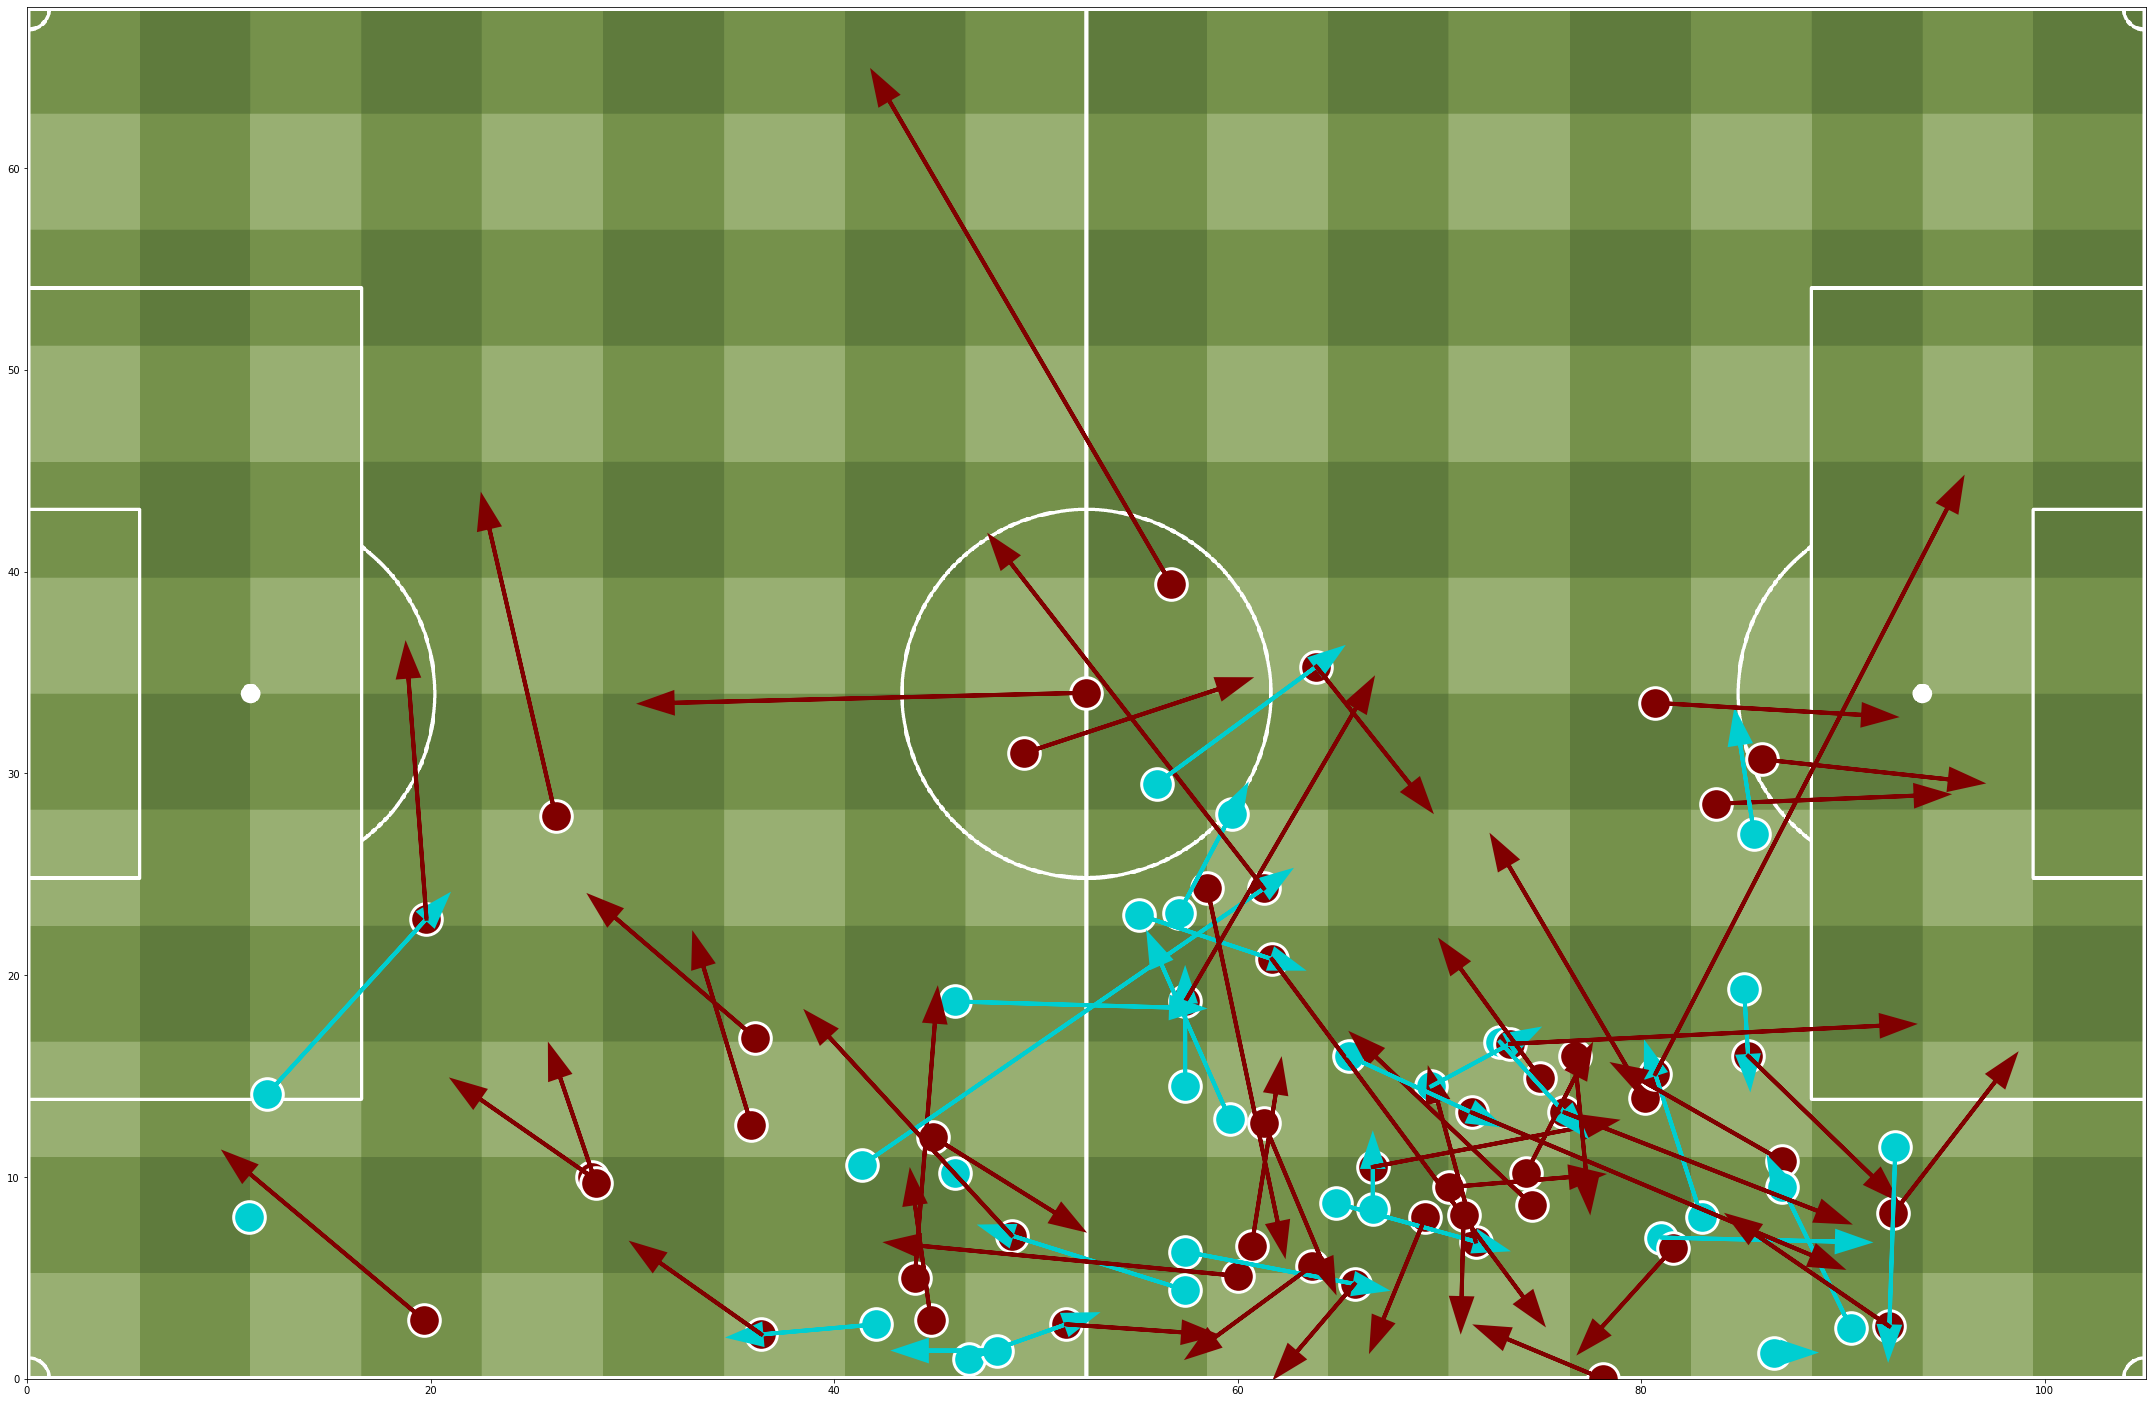

---

_Sports Python Educational Project content, licensed under Attribution-NonCommercial-ShareAlike 4.0 International_